In [2]:
import os
import pandas as pd
import cv2 
import pickle
from tqdm import tqdm

In [3]:
df = pd.read_csv('../input/prostate-cancer-grade-assessment/train.csv')

In [4]:
df.head(2)

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0


In [6]:
from sklearn.model_selection import train_test_split
df, _ = train_test_split(df, test_size=len(df) - 3000, stratify=df['isup_grade'], random_state=102)

In [10]:
df = df.reset_index(drop=True)

In [ ]:
X = []
image_ids = []

# Parcourir le DataFrame
for idx, row in tqdm(df.iterrows()):
    image_id = row['image_id']
    image_path =f'../input/prostate-cancer-grade-assessment/train_images/{image_id}.tiff'
    
    try : 
        img = cv2.imread(image_path)
        
        if img is not None:
            img_resized = cv2.resize(img, (100, 100))
            
            X.append(img_resized)
            image_ids.append(image_id)
        else:
            print(f"L'image {image_id} n'a pas pu être chargée.")
    except:
        print("-Error")

In [13]:
# Sauvegarder X et image_id dans un fichier pickle
with open('images_50x50.pickle', 'wb') as f:
    pickle.dump({'X': X, 'image_id': image_ids}, f)

print("Sauvegarde terminée dans le fichier images_50x50.pickle.")

Sauvegarde terminée dans le fichier images_50x50.pickle.


In [16]:
import pickle
import matplotlib.pyplot as plt
import random

# Charger les données du fichier pickle
with open('/kaggle/working/images_50x50.pickle', 'rb') as f:
    data = pickle.load(f)

X = data['X']
image_ids = data['image_id']

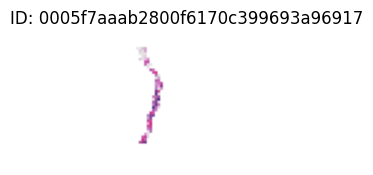

In [21]:
indices = random.sample(range(len(X)), 1)

# Afficher les images sélectionnées
plt.figure(figsize=(10, 2))

for i, idx in enumerate(indices):
    img = X[idx]
    img_id = image_ids[idx]
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"ID: {img_id}")
    plt.axis('off')

plt.show()

In [22]:
df.shape

(10616, 4)

In [25]:
3000*5/60/60

4.166666666666667